## Basic Time Series Metrics & Resampling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


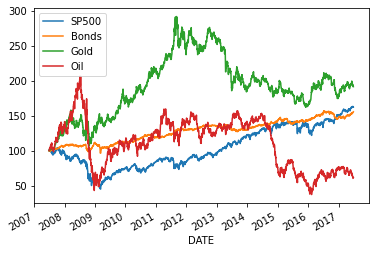

In [3]:

prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')


print(prices.info())


first_prices = prices.iloc[0]


normalized = prices.div(first_prices).mul(100)


normalized.plot()
plt.show()